In [1]:
import json
import numpy as np
import matplotlib
from matplotlib import style
style.use('ggplot')
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc

In [2]:
calc_input = build_default_calc('jwst', 'nircam', 'sw_imaging')
calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 0.01  # mJy (flat spectrum)
calc_input['scene'][0]['spectrum']['normalization']['norm_wave'] = 2.0   # microns
calc_input['background'] = 'low'
calc_input['scene'][0]['shape']['geometry'] = 'sersic'
calc_input['scene'][0]['shape']['sersic_index'] = 1.0  # exponential disc
calc_input['scene'][0]['shape']['major'] = 0.2
calc_input['scene'][0]['shape']['minor'] = 0.1
calc_input['scene'][0]['position']['orientation'] = 60.0
report = perform_calculation(calc_input, dict_report=False, webapp=True)
report_dict = report.as_dict()
report_fits = report.as_fits()
for w, msg in report_dict['warnings'].items():
    print(w + ": " + msg)
print(report_dict['scalar'])

{'reference_wavelength': 0.6985118031370104, 'on_source_time': 1934.66, 'total_flux': 218.25573100676118, 'flux': 11.662109054924063, 'sn': 118.27783292717893}


<IPython.core.display.Javascript object>


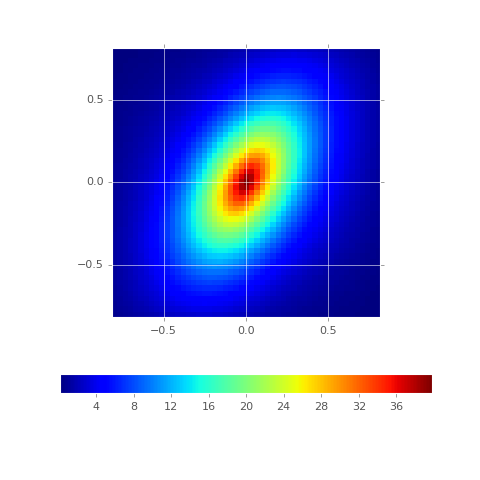

In [5]:
plt.figure(figsize=(6, 6))
t = report_dict['transform']
extent = [t['x_min'], t['x_max'], t['y_min'], t['y_max']]
implot = plt.imshow(report_dict['2d']['snr'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')
plt.show()

In [4]:
calc_input

{'background': 'low',
 'calculation': {'effects': {'background': True,
   'ipc': True,
   'saturation': True},
  'noise': {'crs': False,
   'darkcurrent': True,
   'ffnoise': True,
   'readnoise': True,
   'rn_correlation': True}},
 'configuration': {'detector': {'nexp': 1,
   'ngroup': 10,
   'nint': 1,
   'readmode': 'deep2',
   'subarray': 'full'},
  'instrument': {'aperture': 'any',
   'disperser': None,
   'filter': 'z087',
   'instrument': 'wfirstimager',
   'mode': 'imaging'}},
 'scene': [{'id': 1,
   'position': {'orientation': 60.0, 'x_offset': 0.0, 'y_offset': 0.0},
   'shape': {'geometry': 'sersic',
    'major': 0.5,
    'minor': 0.2,
    'sersic_index': 1.0},
   'spectrum': {'lines': [],
    'name': 'generic source',
    'normalization': {'norm_flux': 0.01,
     'norm_fluxunit': 'mjy',
     'norm_wave': 2.0,
     'norm_waveunit': 'microns',
     'type': 'at_lambda'},
    'sed': {'sed_type': 'flat', 'unit': 'fnu'}}}],
 'strategy': {'aperture_size': 0.2,
  'display_string': '